In [205]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [206]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


# K-Means Step

### 1. Scale/Normalize the data
### 2. Initialize Centroids
### 3. Label Each Data point
### 4. Update Centroid
### 5. Repeat Steps 3 and 4 until centroids stop changing

# Assignments 1 

### Buatlah Clustering dengan menggunakan K-Means menggunakan Dataset {5, 12, 14, 20, 26, 28, 35, 40, 42, 50}

#### A. Clustering data tersebut menggunakan K-Means dimana centroidnya 12, 28, 42 

In [207]:
# Ubah Array jadi Pandas.dataframe biar gampang pakai rumusnya
def create_dataframe(data:list, centroids:list):
    # old procedure to create a dataframe, don't work if the centroid has same value
    # because dataframe and dictionary requires a unique value
    
#     label = {}
#     for centroid in centroids:
#         centroid = round(centroid, 2)
#         label[centroid] = data
#     return pd.DataFrame(label)

    dataframe = pd.DataFrame()
    for n in range(0, len(centroids)):
        dataframe[n] = data
    dataframe.columns = centroids
    return dataframe

    

In [208]:
# Melakukan perhitungan jarak menggunakan rumus manhattan untuk melakukan kalkulasi clustering
def get_labels_manhattan(data, centroids):
    """This Function uses manhattan distance to calculate the distance between Centroid and Data"""
    # This line of code will calculate the distance of each centroid to its value using the manhattan distance
    # each data will be subtracted againts each centroid [it will start counting from each centroid column then to the next row]
    
    distance = np.abs(data-centroids[0:len(centroids)])
    # uncomment if you want to see the distance of each value to its centroid
#     print(distance)
    # Return the least distance
    return distance.idxmin(axis = 1)
        
    

In [209]:
def new_centroid(data, label):
    # cari mean dari tiap data yang telah di group
    
    # to see what group by does
#     check_grouped_data = data.groupby(label)
#     for key, item in check_grouped_data:
#         print(check_grouped_data.get_group(key), "\n\n")
    
    # to see what the mean method does, uncomment if you want to see the mean value
#     print(data.groupby(label).mean())
    
    grouped_data = data.groupby(label).mean().T

    return grouped_data


## Visualize the Clustering Algorithm

### we'll be using matplotlib and scikit learn to visualize our data movement

In [6]:
# imports
from sklearn.decomposition import PCA # to help visualize N dimension data, PCA summarise our variabels
from IPython.display import clear_output # this will clear our graph so we can have a graph that's continously updating

In [7]:
def plot_clusters(data, labels, centroid, iteration):
    pca = PCA(n_components = 2) # this will turn our data into two columns
    data_2d = pca.fit_transform(data)
    centroids_2d = pca.transform(centroids.T)
    clear_output(wait=True) # clear our output
    plt.title(f'{iteration}')
    plt.scatter(x=data_2d[:,0], y=data_2d[:1], c=labels)
    plt.scatter(x=centroids_2d[:,0], y=centroids_2d[:,1])
    plt.show()

# K-means Clustering Start No 1

In [210]:
# Making The Dataset
data = np.array([5, 12, 14, 20, 26, 28, 35, 40, 42, 50]) # Making The Centroid
k = 3 # just a reminder that K is 3
centroids = np.array([12, 28, 42])
create_dataframe(data, centroids) 

,12,28,42
0,5,5,5
1,12,12,12
2,14,14,14
3,20,20,20
4,26,26,26
5,28,28,28
6,35,35,35
7,40,40,40
8,42,42,42
9,50,50,50


In [27]:
# Create a new dataframe with centroid as column names and data as it's row. Each row has
# every data
check_dataset = create_dataframe(data, centroids) 
print('\n')
# For each column/centroid, calculate the distance between the centroid number to the data
# then for each row, grab the centroid id where the distance is the smallest. return the label
check_label = get_labels_manhattan(check_dataset, centroids)
print('Labels')
# see the label result
print(check_label)
print('\n Group By')

# Then we group the data based on the label, label 12 takes 4 rows, so the first 4 rows of the original dataset
# will be assigned to group 12. This will be done to all 3 columns
check_grouped_data = check_dataset.groupby(check_label)
for key, item in check_grouped_data:
        print(check_grouped_data.get_group(key), "\n\n")
        
# Create new centroid by grouping it like the step before, then use .mean() to calculate the mean of all value inside
# of the group. Then we need to transpose it to get the actual new centroid coordinate
print('\n New Centroid')
check_new_centroid = new_centroid(check_dataset, check_label)
print('\n')
print(check_new_centroid)



   12  28  42
0   7  23  37
1   0  16  30
2   2  14  28
3   8   8  22
4  14   2  16
5  16   0  14
6  23   7   7
7  28  12   2
8  30  14   0
9  38  22   8
Labels
0    12
1    12
2    12
3    12
4    28
5    28
6    28
7    42
8    42
9    42
dtype: int64

 Group By
   12  28  42
0   5   5   5
1  12  12  12
2  14  14  14
3  20  20  20 


   12  28  42
4  26  26  26
5  28  28  28
6  35  35  35 


   12  28  42
7  40  40  40
8  42  42  42
9  50  50  50 



 New Centroid
   12  28  42
0   5   5   5
1  12  12  12
2  14  14  14
3  20  20  20 


   12  28  42
4  26  26  26
5  28  28  28
6  35  35  35 


   12  28  42
7  40  40  40
8  42  42  42
9  50  50  50 


           12         28         42
12  12.750000  12.750000  12.750000
28  29.666667  29.666667  29.666667
42  44.000000  44.000000  44.000000


       12         28    42
12  12.75  29.666667  44.0
28  12.75  29.666667  44.0
42  12.75  29.666667  44.0


In [211]:
max_iteration = 8
dataset = create_dataframe(data, centroids)
iteration = 1
old_centroid = [0,0,0]
# stop the loop if our iteration has reached its maximum value or if it the centroid has stabilized 

while iteration < max_iteration and not np.all(centroids == old_centroid):
    old_centroid = centroids
    labels = get_labels_manhattan(dataset, centroids)
    centroids = new_centroid(dataset, labels)
    centroids = list(centroids.iloc[0])
    dataset = create_dataframe(data, centroids)
    print(f"Iteration Count: {iteration}")
    print(labels)
    print(centroids)
    print(dataset)
    iteration = iteration + 1
    print("\n")
print("\n")
labels
    


Iteration Count: 1
0    12
1    12
2    12
3    12
4    28
5    28
6    28
7    42
8    42
9    42
dtype: int64
[12.75, 29.666666666666668, 44.0]
   12.750000  29.666667  44.000000
0          5          5          5
1         12         12         12
2         14         14         14
3         20         20         20
4         26         26         26
5         28         28         28
6         35         35         35
7         40         40         40
8         42         42         42
9         50         50         50


Iteration Count: 2
0    12.750000
1    12.750000
2    12.750000
3    12.750000
4    29.666667
5    29.666667
6    29.666667
7    44.000000
8    44.000000
9    44.000000
dtype: float64
[12.75, 29.666666666666668, 44.0]
   12.750000  29.666667  44.000000
0          5          5          5
1         12         12         12
2         14         14         14
3         20         20         20
4         26         26         26
5         28         28         28
6   

0    12.750000
1    12.750000
2    12.750000
3    12.750000
4    29.666667
5    29.666667
6    29.666667
7    44.000000
8    44.000000
9    44.000000
dtype: float64

In [212]:
for i in labels.unique():
    print(f"Cluster {i}")
    print(f"Cluster Member:")
    print(list(dataset[labels == i].T.iloc[0]))
    print("\n")

Cluster 12.75
Cluster Member:
[5, 12, 14, 20]


Cluster 29.666666666666668
Cluster Member:
[26, 28, 35]


Cluster 44.0
Cluster Member:
[40, 42, 50]




# K-means Clustering Start No 2

In [213]:
# Making The Dataset
data = np.array([5, 12, 14, 20, 26, 28, 35, 40, 42, 50]) # Making The Centroid
k = 3 # just a reminder that K is 3
centroids = np.array([5, 12, 14])

In [214]:
max_iteration = 8
dataset = create_dataframe(data, centroids)
iteration = 1
old_centroid = [0,0,0]
# stop the loop if our iteration has reached its maximum value or if it the centroid has stabilized 

while iteration < max_iteration and not np.all(centroids == old_centroid):
    old_centroid = centroids
    labels = get_labels_manhattan(dataset, centroids)
    centroids = new_centroid(dataset, labels)
    centroids = list(centroids.iloc[0])
    dataset = create_dataframe(data, centroids)
    print(f"Iteration Count: {iteration}")
    print(labels)
    print(centroids)
    print(dataset)
    iteration = iteration + 1
    print("\n")
print("\n")
labels
    

Iteration Count: 1
0     5
1    12
2    14
3    14
4    14
5    14
6    14
7    14
8    14
9    14
dtype: int64
[5.0, 12.0, 31.875]
   5.000   12.000  31.875
0       5       5       5
1      12      12      12
2      14      14      14
3      20      20      20
4      26      26      26
5      28      28      28
6      35      35      35
7      40      40      40
8      42      42      42
9      50      50      50


Iteration Count: 2
0     5.000
1    12.000
2    12.000
3    12.000
4    31.875
5    31.875
6    31.875
7    31.875
8    31.875
9    31.875
dtype: float64
[5.0, 15.333333333333334, 36.833333333333336]
   5.000000   15.333333  36.833333
0          5          5          5
1         12         12         12
2         14         14         14
3         20         20         20
4         26         26         26
5         28         28         28
6         35         35         35
7         40         40         40
8         42         42         42
9         50         50       

0    10.333333
1    10.333333
2    10.333333
3    24.666667
4    24.666667
5    24.666667
6    41.750000
7    41.750000
8    41.750000
9    41.750000
dtype: float64

In [215]:
# print out each members of each cluster
for i in labels.unique():
    print(f"Cluster {i}")
    print(f"Cluster Member:")
    print(list(dataset[labels == i].T.iloc[0]))
    print("\n")

Cluster 10.333333333333334
Cluster Member:
[5, 12, 14]


Cluster 24.666666666666668
Cluster Member:
[20, 26, 28]


Cluster 41.75
Cluster Member:
[35, 40, 42, 50]




##  Calculate SSE and Elbow

In [216]:
def calculate_loss(labels, dataset):
    """Use this in the end of the Clustering, The label is the final label
    and the dataset is the final dataset i.e. the column name is the final label"""
    
    final_loss = []
    n_cluster = len(labels.unique())
    
    for i in labels.unique():
        # print(f"Cluster {i}")
        # print(f"Cluster Member:")
        # dataset[labels == i].T is to print out the correct cluster id data
        # without the T, the data will read the column data and not the row data
        # after that we need to use .iloc[0] to get the actual value. without it
        # we will only have the id of the data
        centroid_member = list(dataset[labels == i].T.iloc[0])
        
        # print each member of the centroid
        # print(centroid_member)
        
        # calculate the SSE of each centroid i.e. distance of centroid to data then squared
        centroid_i_loss = np.sum((i - centroid_member)**2)
        final_loss.append(centroid_i_loss)
        
        # print the loss for this particular centroid
        # print(f"Loss for this centroid: {centroid_i_loss}")
        # print("\n")
    
    # sum all the loss each centroid have
    total_loss = np.sum(final_loss)
    print(f"total loss of this {n_cluster} cluster {total_loss}")
    
    # return the number of cluster and total loss
    return n_cluster, total_loss

In [217]:
# this uses the final labels and dataset from question 1
calculate_loss(labels, dataset)

total loss of this 3 cluster 196.08333333333334


(3, 196.08333333333334)

## Lets try creating an elbow for clustering

In [218]:
# Making The Dataset
try_loss_data = np.array([5, 12, 14, 20, 26, 28, 35, 40, 42, 50]) # Making The Centroid
k_try = 10 # we will try to cluster from 1 to 10

In [219]:
def create_centroid(k):
    """Create the centroid"""
    centroid = np.random.randint(40, size=(k))
    return list(centroid)

In [220]:
# Generate random cluster from 1 to 10, remember that range stops at -1 of n
centroid_list = []
for i in range(2, k_try+1):
    centroid_list.append(create_centroid(i))
centroid_list

[[36, 31],
 [29, 17, 20],
 [13, 18, 30, 19],
 [18, 16, 34, 37, 39],
 [14, 31, 21, 24, 38, 15],
 [3, 26, 32, 30, 34, 18, 23],
 [18, 0, 5, 20, 37, 31, 23, 18],
 [22, 13, 27, 25, 7, 14, 10, 23, 17],
 [10, 27, 6, 21, 7, 26, 31, 22, 10, 6]]

In [221]:
def fit_kmean(data, centroids, k):
    max_iteration = 8
    dataset = create_dataframe(data, centroids)
    # print(dataset)
    iteration = 1
    old_centroid = list(np.zeros(k))
    # stop the loop if our iteration has reached its maximum value or if it the centroid has stabilized 
    while iteration < max_iteration and not np.all(centroids == old_centroid):
        old_centroid = centroids
        labels = get_labels_manhattan(dataset, centroids)
        centroids = new_centroid(dataset, labels)
        centroids = list(centroids.iloc[0])
        dataset = create_dataframe(data, centroids)
        # print(f"Iteration Count: {iteration}")
        # print(labels)
        # print(centroids)
        # print(dataset)
        iteration = iteration + 1
        print("\n")
    print("\n")
    print(labels)
    loss = calculate_loss(labels, dataset)
    return labels, loss
    

In [222]:
label_value = []
for i in range(0, k_try-1):
    label_value.append(fit_kmean(try_loss_data, centroid_list[i], i))







0    17.50
1    17.50
2    17.50
3    17.50
4    17.50
5    17.50
6    41.75
7    41.75
8    41.75
9    41.75
dtype: float64
total loss of this 2 cluster 504.25








0    10.333333
1    10.333333
2    10.333333
3    24.666667
4    24.666667
5    24.666667
6    41.750000
7    41.750000
8    41.750000
9    41.750000
dtype: float64
total loss of this 3 cluster 196.08333333333334








0    10.333333
1    10.333333
2    10.333333
3    24.666667
4    24.666667
5    24.666667
6    41.750000
7    41.750000
8    41.750000
9    41.750000
dtype: float64
total loss of this 3 cluster 196.08333333333334






0    10.333333
1    10.333333
2    10.333333
3    23.000000
4    23.000000
5    31.500000
6    31.500000
7    44.000000
8    44.000000
9    44.000000
dtype: float64
total loss of this 4 cluster 143.16666666666666






0    10.333333
1    10.333333
2    10.333333
3    20.000000
4    26.000000
5    28.000000
6    41.750000
7    41.750000
8    41.750000
9    41.750000
dtype: float64
t

In [168]:
# This cell is for debugging, I used a dictionary to create the dataframe with the centroid value as keys. I forgot
# that a dictionary and dataframe requires a unique key so it automatically gets rid of one of the value
# this is the debugging that i did

# hh_centroids = [0, 7, 13, 33, 30, 17, 4, 17, 6]
# hh_dataframe = create_dataframe(try_loss_data, hh_centroids)
# print(hh_dataframe)
# print(len(hh_centroids))
# print(hh_centroids[0:len(hh_centroids)])
# # print(hh_dataframe-centroids[0:len(hh_centroids)])
# print(hh_dataframe - [0, 7, 13, 33, 30, 17, 4, 17, 6])
# # distance = np.abs(hh_dataframe-centroids[0:len(hh_centroids)])
# # print(distance)

In [223]:
# For printing out the centroid value assignment
k_centroid = 2
for labels in label_value:
    print(f"Centroid Number: {k_centroid} \n")
    k_centroid = k_centroid+1
    for i in labels[0].unique():
        print(f"Centroid: {round(i,2)}")
        print(list(dataset[labels[0] == i].T.iloc[0]))
        print("\n")
    print("\n")


Centroid Number: 2 

Centroid: 17.5
[5, 12, 14, 20, 26, 28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 3 

Centroid: 10.33
[5, 12, 14]


Centroid: 24.67
[20, 26, 28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 4 

Centroid: 10.33
[5, 12, 14]


Centroid: 24.67
[20, 26, 28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 5 

Centroid: 10.33
[5, 12, 14]


Centroid: 23.0
[20, 26]


Centroid: 31.5
[28, 35]


Centroid: 44.0
[40, 42, 50]




Centroid Number: 6 

Centroid: 10.33
[5, 12, 14]


Centroid: 20.0
[20]


Centroid: 26.0
[26]


Centroid: 28.0
[28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 7 

Centroid: 5.0
[5]


Centroid: 15.33
[12, 14, 20]


Centroid: 27.0
[26, 28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 8 

Centroid: 5.0
[5]


Centroid: 13.0
[12, 14]


Centroid: 20.0
[20]


Centroid: 26.0
[26]


Centroid: 28.0
[28]


Centroid: 41.75
[35, 40, 42, 50]




Centroid Number: 9 

Centroid: 5.0
[5]


Centroid: 12.0
[12]


Centro

In [224]:
def create_x_and_y(label_value):
    """This is for Plotting the elbow, I want to create an X and Y where X is the number of cluster and Y
    Is the Loss. So that i could plot it easire"""
    
    # the y value is inside a () so we need to grab it the first [1] indicates
    # that we want to grab the loss, the [0] is for the label value, the second [1]
    # indicates that we want to grab the actual loss value,
    # [0][n] = labels
    # [1][n] = loss tupple
    # [1][1] = loss value
    # [1][0] = cluster count
    y = [round(label[1][1], 2) for label in label_value]
    x = [i for i in range(0, len(y))]
    print(x)
    print(y)
    return x, y

[0, 1, 2, 3, 4, 5, 6, 7, 8]
[504.25, 196.08, 196.08, 143.17, 161.42, 153.42, 118.75, 151.42, 118.75]


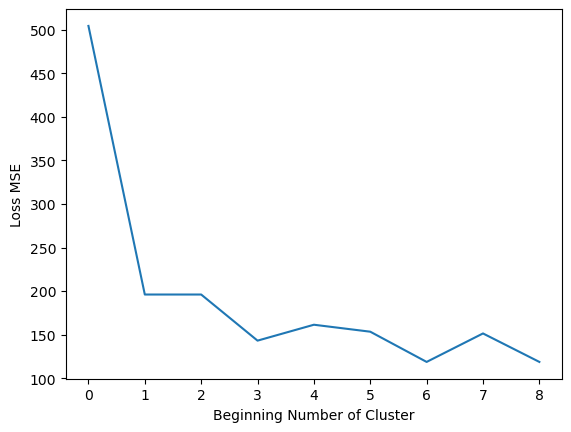

In [225]:
import matplotlib.pyplot as plt
def plot_elbow():    
    x_y = create_x_and_y(label_value)
    x = x_y[0]
    y = x_y[1]
    plt.xlabel("Beginning Number of Cluster")
    plt.ylabel("Loss MSE")
    plt.plot(x, y)
plot_elbow()